In [1]:
import numpy as np
import matplotlib.pyplot as plt
import paq.raices as rts
%matplotlib inline

Queremos encontrar las raices de la función
$$ f(\psi) = \psi - e \sin\psi - \omega t,$$
resolveremos a $\psi$  como función del tiempo en unidades de $1/\omega$.

In [4]:
def resta(psi):
    return psi - exc * np.sin(psi) - t
def dresta(psi):
    return 1 - exc * np.cos(psi) 

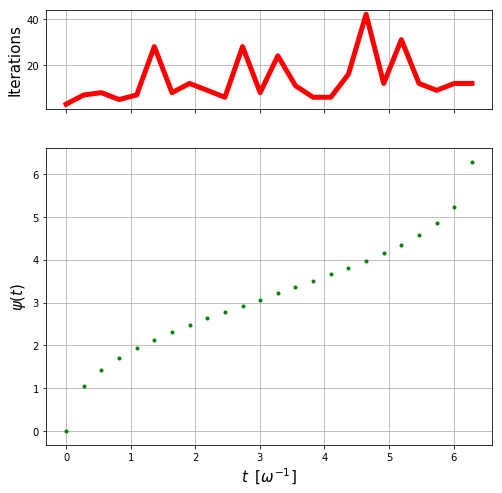

In [24]:
time = np.arange(0.0,2* np.pi, 1/12.)
time = np.linspace(0,2*np.pi, 12*2)
roots = []
iterations = []
exc = .9

fig, axs = plt.subplots(2, figsize=(8,8), sharex = True, gridspec_kw={'height_ratios': [1, 3]})
axs[0].grid(True)
axs[1].grid(True)

axs[1].set_xlabel(r"$t\;\; [\omega^{-1}]$",fontsize = 15)
axs[0].set_ylabel("Iterations",fontsize = 15)
axs[1].set_ylabel(r"$\psi(t)$",fontsize = 15)
#axs[1].set_xlim([0,1.5])
#ax.set_ylim([-.1,1.1])


for i in range(0,len(time)):
    t = time[i]     
    [rt, count] = rts.newton_raphson(resta, dresta, .1, iteration_num = True)
    roots.append(rt)
    iterations.append(count)
axs[1].plot(time, roots,'.', color = 'g', lw = 5)
axs[0].plot(time,iterations, color = 'r', lw = 5)
plt.show()

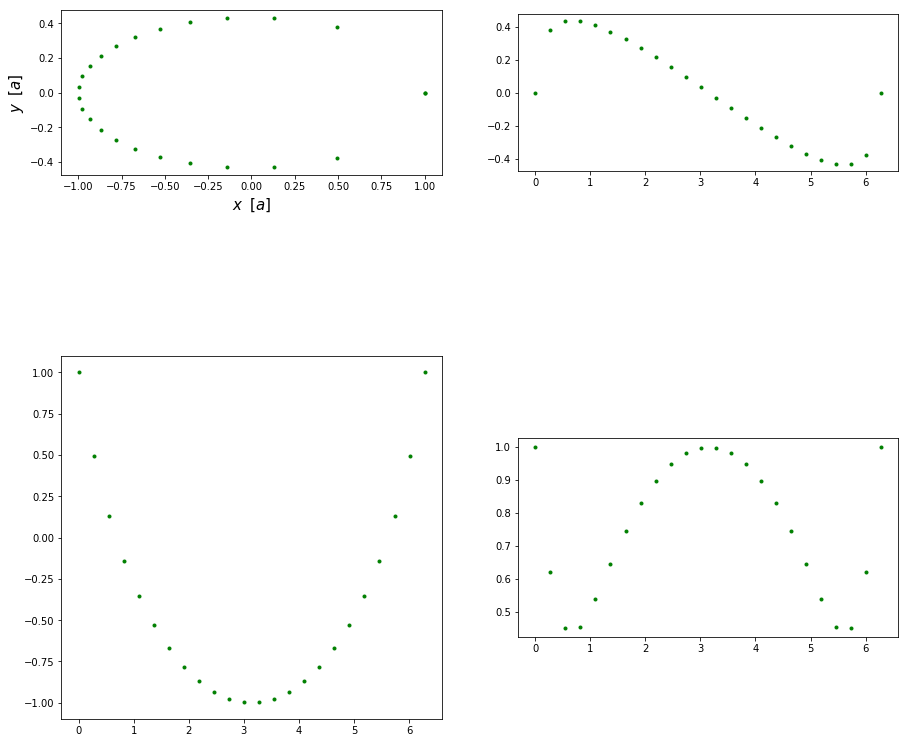

In [25]:
roots = np.array(roots)
x =  np.cos(roots)
y = np.sqrt(1-(exc*exc) ) * np.sin(roots)
r = np.sqrt(x*x + y*y)

fig, axs = plt.subplots(2,2,figsize=(15,15))
axs[0,0].plot(x,y, '.', color = 'g', lw = 5)
axs[0,0].set_aspect(1)
axs[0,0].set_xlabel(r"$x\;\; [a]$",fontsize = 15)
axs[0,0].set_ylabel(r"$y\;\; [a]$",fontsize = 15)

axs[1,0].plot(time, x, '.', color = 'g', lw = 5)
axs[1,0].set_aspect(3)
axs[0,1].plot(time, y, '.', color = 'g', lw = 5)
axs[0,1].set_aspect(3)
axs[1,1].plot(time, r, '.', color = 'g', lw = 5)
axs[1,1].set_aspect(6)


plt.show()